In [8]:
import numpy as np
from scipy.stats import norm
import scipy.signal as signal
import numpy.matlib
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
nW = 40
nH = 40
nT = 5
nF1 = 3
nF2 = 2
f1sz = 11
f2sz = 7
nCell = 10

In [10]:
x = norm.pdf(np.linspace(-1,1,f1sz), loc=0, scale=.5)
y = norm.pdf(np.linspace(-3,1,f1sz), loc=0, scale=.3) - norm.pdf(np.linspace(-1,3,f1sz), loc=0, scale=.5)
z = norm.pdf(np.linspace(-1.5,1.5,nT), loc=0, scale=.7)
xy = np.matmul(x[:, np.newaxis], y[:, np.newaxis].T)
xyz = np.tile(xy[np.newaxis,:,:], (nT, 1, 1)) * z[:,np.newaxis, np.newaxis]
convFilt1 = 3 * xyz/np.linalg.norm(xyz.flatten())
print(convFilt1.shape)

(5, 11, 11)


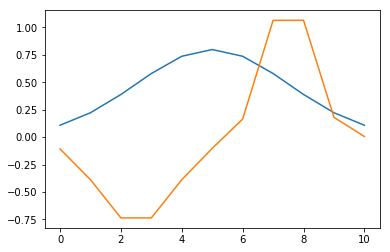

In [11]:
fig, ax = plt.subplots(1)
ax.plot(x)
ax.plot(y)
plt.show()

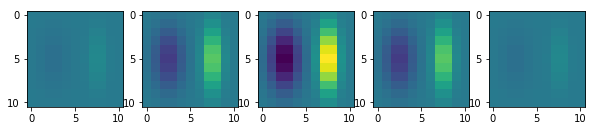

In [12]:
fig, ax = plt.subplots(1, nT, figsize=(10, 5))
vmin, vmax = convFilt1.min(), convFilt1.max()
for i, filt in enumerate(convFilt1):
    ax[i].imshow(filt, vmin=vmin, vmax=vmax)


In [13]:
x = norm.pdf(np.linspace(-1,1,f2sz), loc=0, scale=.3)
y = norm.pdf(np.linspace(-1,1,f2sz), loc=0, scale=.7)
z = norm.pdf(np.linspace(-1,1,nT-2), loc=0, scale=.8)
xy = np.matmul(x[:, np.newaxis], y[:, np.newaxis].T)
xyz = np.tile(xy[np.newaxis,:,:], (nT-2, 1, 1)) * z[:,np.newaxis, np.newaxis]
convFilt2 = 3 * xyz/np.linalg.norm(xyz.flatten())
print(convFilt2.shape)

(3, 7, 7)


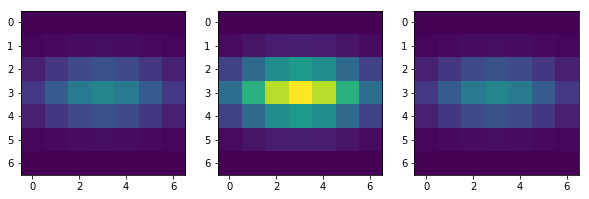

In [14]:
fig, ax = plt.subplots(1, nT-2, figsize=(10, 5))
vmin, vmax = convFilt2.min(), convFilt2.max()
for i, filt in enumerate(convFilt2):
    ax[i].imshow(filt, vmin=vmin, vmax=vmax)

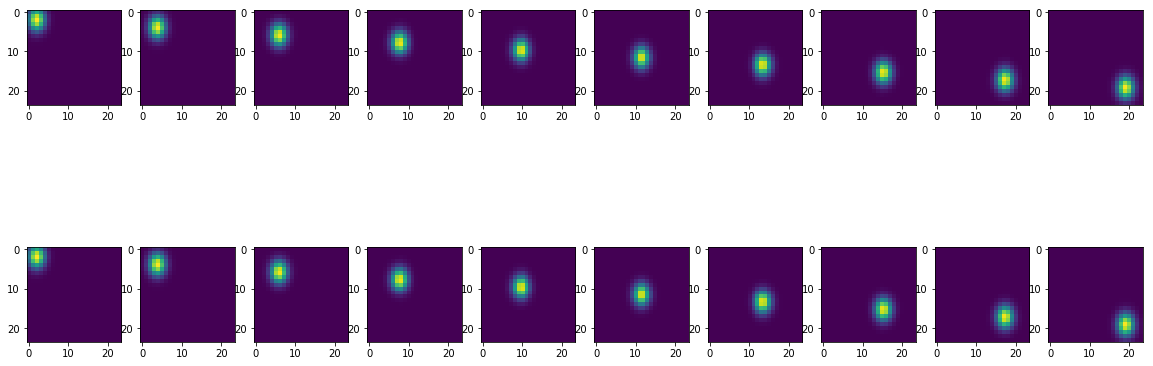

In [19]:
fcSz = (2, 24, 24)
fcFilt = np.zeros((nCell, *fcSz))
for i in range(nCell):
    x = norm.pdf(np.linspace(0, fcSz[1], fcSz[1]), loc=2+i*2, scale=2)
    y = norm.pdf(np.linspace(0, fcSz[2], fcSz[2]), loc=2+i*2, scale=1.5)
    fcFilt[i, 0, :, :] = np.matmul(x[:, np.newaxis], y[:, np.newaxis].T)
    
    x = norm.pdf(np.linspace(0, fcSz[1], fcSz[1]), loc=2+i*2, scale=2)
    y = norm.pdf(np.linspace(0, fcSz[2], fcSz[2]), loc=2+i*2, scale=1.5)
    fcFilt[i, 1, :, :] = np.matmul(x[:, np.newaxis], y[:, np.newaxis].T)

fig, ax = plt.subplots(fcSz[0], nCell, figsize=(20, 8))
vmin, vmax = fcFilt.min(), fcFilt.max()
for i, cellFilt in enumerate(fcFilt):
    for j, filt in enumerate(cellFilt):
        ax[j, i].imshow(filt, vmin=vmin, vmax=vmax)

In [10]:
fcFilt = fcFilt.reshape((fcFilt.shape[0], -1))
print(fcFilt.shape)

NameError: name 'fcFilt' is not defined

In [3]:
spike = np.load('spike.npy')

In [4]:
spike.mean(axis=(0,1))

array([0.07840827, 0.07374707, 0.1251568 , 0.08597547, 0.09918013,
       0.14614053, 0.15537347, 0.1311716 , 0.08337093, 0.13148267])